In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1

In [3]:
"""
1
Create an array of 100 random numbers uniformly distributed between 0 and 1. Create
a second array of 200 random numbers with Gaussian distribution between 1 and 100.
"""

unif = np.random.rand(100)
print(unif.shape, unif.mean(), unif.std())
mn = 50
std=34
gauss = np.random.normal(loc=50, scale=34, size=200)
print(gauss.shape, gauss.mean(), gauss.std())


(100,) 0.5269833272165192 0.27566295969450727
(200,) 49.0990816622635 32.99405874959182


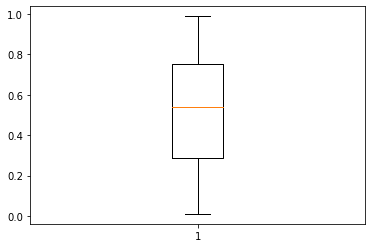

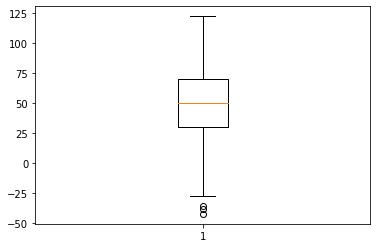

In [4]:
"""
2
Create a box plot for both arrays
"""
plt.boxplot(unif)
plt.show()

plt.boxplot(gauss)
plt.show()

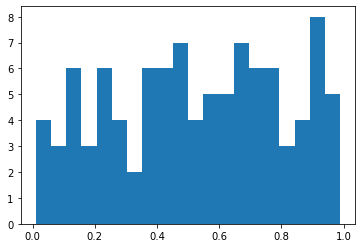

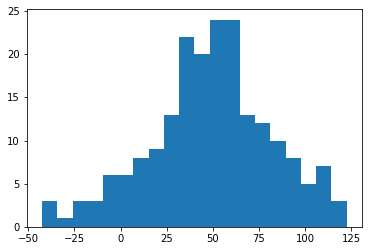

In [5]:
"""
3
Histogram of both arrays using 20 bins
"""

plt.hist(unif, 20)
plt.show()

plt.hist(gauss, 20)
plt.show()

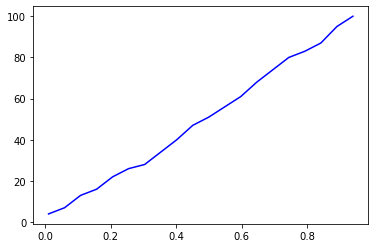

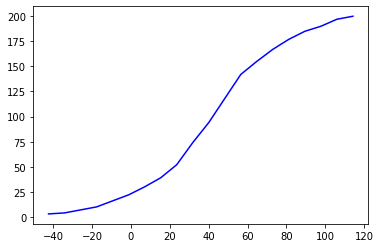

In [6]:
#4
#Write the arrays into a binary file
unif.tofile("unif")
gauss.tofile("gauss")

#read it abck into an array
unif_in = np.fromfile("unif")
gauss_in = np.fromfile("gauss")

#visualize the arrays read in by plotting the cumulative distribution function as a line graph
vals, base = np.histogram(unif, bins=20)
cumulative = np.cumsum(vals)
plt.plot(base[:-1], cumulative, c='blue')
plt.show()

vals, base = np.histogram(gauss, bins=20)
cumulative = np.cumsum(vals)
plt.plot(base[:-1], cumulative, c='blue')
plt.show()

(1000, 2)


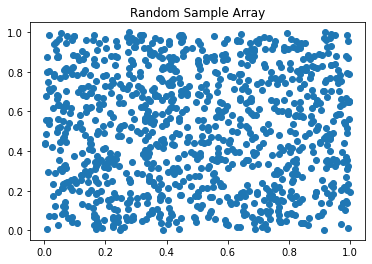

(1000, 2)


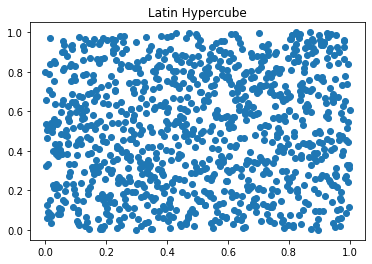

In [69]:
"""
4a
Create 2D arrays using random sampling and Latin hypercube sampling
with 1,000 points on [0,1] x [0,1]. Plot the arrays with a scatter plot and compare.
Note: You can find python packages for LHS such as in scipy.stats.qmc or pyDOE.
"""
from scipy import stats

rsa = np.random.random([1000,2])
print(rsa.shape)
plt.scatter(rsa[:,0],rsa[:,1])
plt.title("Random Sample Array")
plt.show()

#Not totally sure how to make a 2d latin hypercube
sampler = stats.qmc.LatinHypercube(d=2)
lhs = sampler.random(n=1000)
print(lhs.shape)
plt.scatter(lhs[:,0],lhs[:,1])
plt.title("Latin Hypercube")
plt.show()


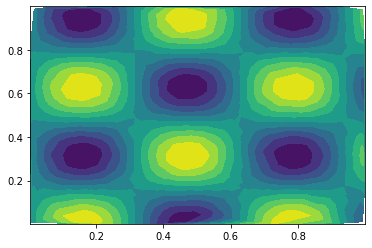

In [72]:
"""
4b)
 Using the random sampling array, assign a z-value according to the function
z = sin(10x) * cos (10y). Plot this new data set as a contour plot with 10 levels.
Hint: Use tricontourf in matplotlib as it is unstructured data.
"""

z = np.sin(10*rsa[:,0]) * np.cos(10*rsa[:,1])
plt.tricontourf(rsa[:,0], rsa[:,1], z, levels=10)
plt.show()


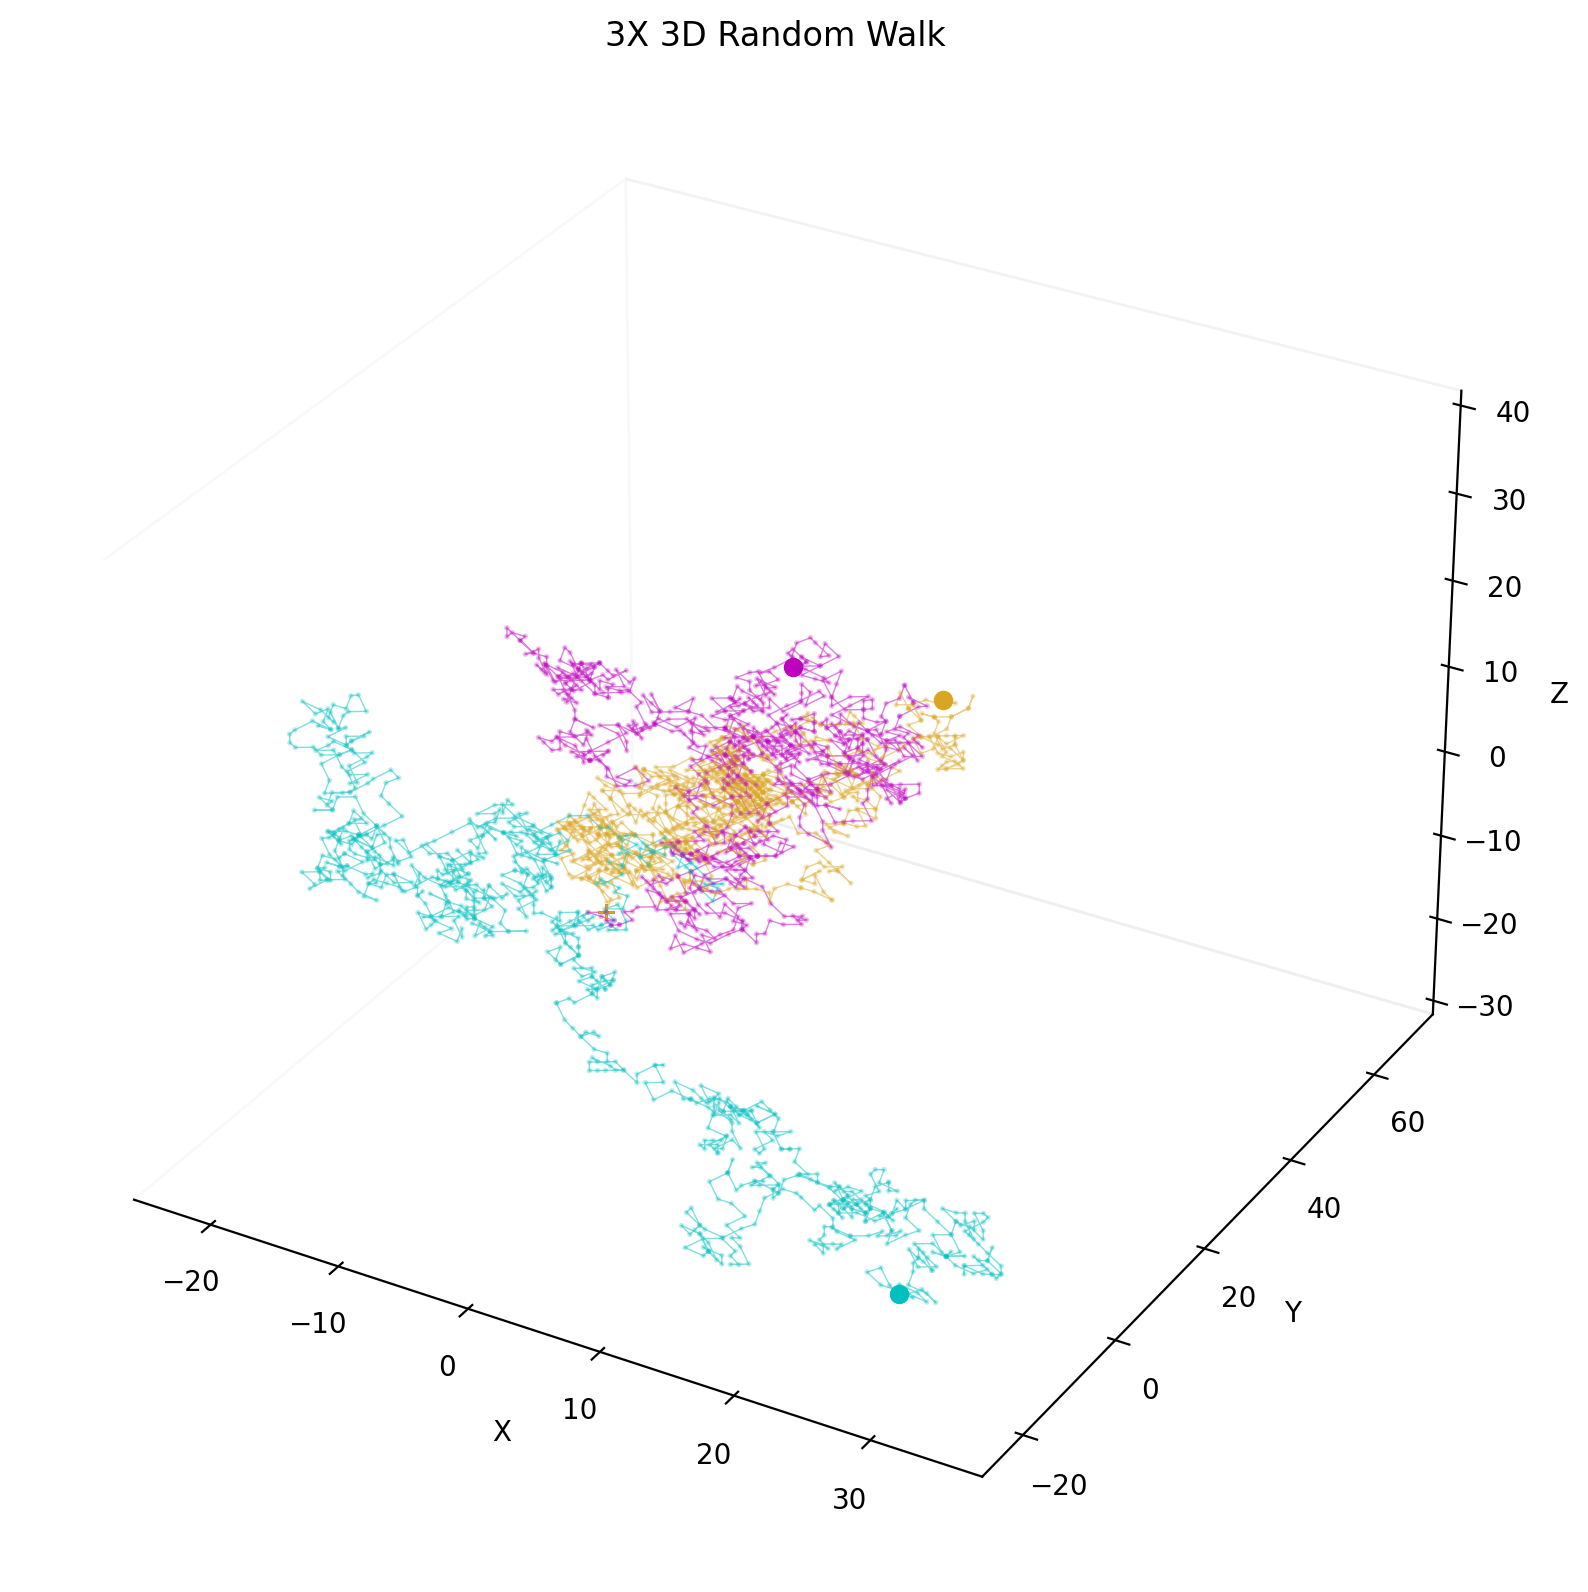

In [68]:
"""
5 
Create three random walk data sets in 3D. Take 1,000 steps in each. Plot all
three on the same plot using lines and a different color for each.
Note: A random walk is a simple simulation in which at each step you randomly
move +1 or -1 in the either the x, y, or z dimension.
"""

def plot3dWalk(path, ax, color):
    # Plot the path
    ax.scatter3D(path[:,0], path[:,1], path[:,2], 
                c=color, alpha=0.25,s=1)
    ax.plot3D(path[:,0], path[:,1], path[:,2], 
            c=color, alpha=0.5, lw=0.5)
    #plot start point
    start = path[:1]
    ax.plot3D(start[:,0], start[:,1], start[:,2], 
              c=color, marker='+')
    #plot end point
    stop = path[-1:]
    ax.plot3D(stop[:,0], stop[:,1], stop[:,2], 
              c=color, marker='o')

poss_steps = [0, 1, -1]
start = np.zeros((1, 3))

colors = ['c', 'm', 'goldenrod']
fig = plt.figure(figsize=(10,10),dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3X 3D Random Walk')

for i in range(3):
    steps = np.random.choice(a=poss_steps, size=(1000, 3))
    rw = np.concatenate([start, steps]).cumsum(0)

    plot3dWalk(rw, ax, colors[i])

plt.show()

## Part 2

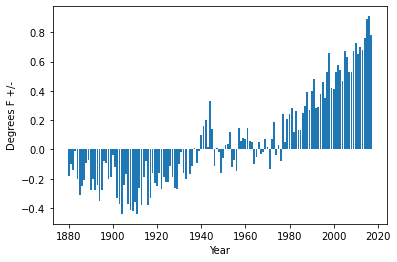

In [83]:
"""
1
Download the NOAA Land Ocean Temperature Anomalies Data Set:
https://my.eng.utah.edu/~cs6635/NOAA-Temperatures.csv. Create a bar plot of the
data. Include a label called “Year” along the x-axis and a label called Degrees F +/-
From Average along the y-axis. 
"""
import pandas as pd

df = pd.read_csv('NOAA-Temperatures.csv', header=4)

plt.bar(df['Year'], df['Value'])
plt.xlabel("Year")
plt.ylabel("Degrees F +/-")
plt.show()

"""
Describe trends in the data--

From 1880 to about 1910 temperatures were cooling each year. The trend started moving upward after that.
Looks like temperatures have been rising consistently since about 1980.
"""
